In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('weatherAUS.csv')

In [4]:
df.shape

(208495, 24)

In [5]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [6]:
col_names = df.columns
col_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [7]:
df.drop('RISK_MM',axis=1,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208495 entries, 0 to 208494
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           208495 non-null  object 
 1   Location       208495 non-null  object 
 2   MinTemp        205210 non-null  float64
 3   MaxTemp        205410 non-null  float64
 4   Rainfall       202565 non-null  float64
 5   Evaporation    98965 non-null   float64
 6   Sunshine       90293 non-null   float64
 7   WindGustDir    192729 non-null  object 
 8   WindGustSpeed  192836 non-null  float64
 9   WindDir9am     192360 non-null  object 
 10  WindDir3pm     199827 non-null  object 
 11  WindSpeed9am   204653 non-null  float64
 12  WindSpeed3pm   201241 non-null  float64
 13  Humidity9am    204144 non-null  float64
 14  Humidity3pm    200166 non-null  float64
 15  Pressure9am    185495 non-null  float64
 16  Pressure3pm    185514 non-null  float64
 17  Cloud9am       119419 non-nul

In [9]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 7 categorical variables

The categorical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [10]:
df[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


In [11]:
df[categorical].isnull()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
208490,False,False,False,False,False,False,False
208491,False,False,False,False,False,False,False
208492,False,False,False,False,False,False,False
208493,False,False,False,False,False,False,False


In [12]:
df[categorical].isnull().sum()

Date                0
Location            0
WindGustDir     15766
WindDir9am      16135
WindDir3pm       8668
RainToday        5930
RainTomorrow     5929
dtype: int64

In [13]:
# view frequency of categorical variables

for var in categorical: 
    
    print(df[var].value_counts())

2015-08-28    49
2015-12-16    49
2015-12-04    49
2015-12-05    49
2015-12-06    49
              ..
2007-11-29     1
2007-11-28     1
2007-11-27     1
2007-11-26     1
2008-01-31     1
Name: Date, Length: 4745, dtype: int64
Canberra            4745
Sydney              4653
Darwin              4502
Hobart              4502
Brisbane            4502
Melbourne           4502
Perth               4501
Wollongong          4349
AliceSprings        4349
Launceston          4349
Townsville          4349
GoldCoast           4349
Cairns              4349
Ballarat            4349
Albury              4349
Albany              4348
MountGambier        4348
Tuggeranong         4348
Penrith             4348
Bendigo             4340
MountGinini         4337
Williamtown         4318
Richmond            4318
Cobar               4318
CoffsHarbour        4318
Moree               4318
Woomera             4318
NorfolkIsland       4318
Mildura             4318
Dartmoor            4318
Watsonia            4318

In [14]:
# view frequency distribution of categorical variables

for var in categorical: 
    
    print(df[var].value_counts()/np.float(len(df)))

2015-08-28    0.000235
2015-12-16    0.000235
2015-12-04    0.000235
2015-12-05    0.000235
2015-12-06    0.000235
                ...   
2007-11-29    0.000005
2007-11-28    0.000005
2007-11-27    0.000005
2007-11-26    0.000005
2008-01-31    0.000005
Name: Date, Length: 4745, dtype: float64
Canberra            0.022758
Sydney              0.022317
Darwin              0.021593
Hobart              0.021593
Brisbane            0.021593
Melbourne           0.021593
Perth               0.021588
Wollongong          0.020859
AliceSprings        0.020859
Launceston          0.020859
Townsville          0.020859
GoldCoast           0.020859
Cairns              0.020859
Ballarat            0.020859
Albury              0.020859
Albany              0.020854
MountGambier        0.020854
Tuggeranong         0.020854
Penrith             0.020854
Bendigo             0.020816
MountGinini         0.020801
Williamtown         0.020710
Richmond            0.020710
Cobar               0.020710
CoffsHarbo

In [15]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

Date  contains  4745  labels
Location  contains  49  labels
WindGustDir  contains  17  labels
WindDir9am  contains  17  labels
WindDir3pm  contains  17  labels
RainToday  contains  3  labels
RainTomorrow  contains  3  labels


In [16]:
df['Date'].dtypes

dtype('O')

In [17]:
# parse the dates, currently coded as strings, into datetime format

df['Date'] = pd.to_datetime(df['Date'])

In [18]:
df['Year'] = df['Date'].dt.year

df['Year'].head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Year, dtype: int64

In [19]:
df['Month'] = df['Date'].dt.month

df['Month'].head()

0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: int64

In [20]:
# extract day from date

df['Day'] = df['Date'].dt.day
df['Day'].head()

0    1
1    2
2    3
3    4
4    5
Name: Day, dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208495 entries, 0 to 208494
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           208495 non-null  datetime64[ns]
 1   Location       208495 non-null  object        
 2   MinTemp        205210 non-null  float64       
 3   MaxTemp        205410 non-null  float64       
 4   Rainfall       202565 non-null  float64       
 5   Evaporation    98965 non-null   float64       
 6   Sunshine       90293 non-null   float64       
 7   WindGustDir    192729 non-null  object        
 8   WindGustSpeed  192836 non-null  float64       
 9   WindDir9am     192360 non-null  object        
 10  WindDir3pm     199827 non-null  object        
 11  WindSpeed9am   204653 non-null  float64       
 12  WindSpeed3pm   201241 non-null  float64       
 13  Humidity9am    204144 non-null  float64       
 14  Humidity3pm    200166 non-null  float64       
 15  

In [22]:
# drop the original Date variable

df.drop('Date', axis=1, inplace = True)

In [23]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [24]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 6 categorical variables

The categorical variables are : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [25]:
# check for missing values in categorical variables 

df[categorical].isnull().sum()

Location            0
WindGustDir     15766
WindDir9am      16135
WindDir3pm       8668
RainToday        5930
RainTomorrow     5929
dtype: int64

In [26]:
# print number of labels in Location variable

print('Location contains', len(df.Location.unique()), 'labels')

Location contains 49 labels


In [27]:
# check labels in location variable

df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [28]:
# check frequency distribution of values in Location variable

df.Location.value_counts()

Canberra            4745
Sydney              4653
Darwin              4502
Hobart              4502
Brisbane            4502
Melbourne           4502
Perth               4501
Wollongong          4349
AliceSprings        4349
Launceston          4349
Townsville          4349
GoldCoast           4349
Cairns              4349
Ballarat            4349
Albury              4349
Albany              4348
MountGambier        4348
Tuggeranong         4348
Penrith             4348
Bendigo             4340
MountGinini         4337
Williamtown         4318
Richmond            4318
Cobar               4318
CoffsHarbour        4318
Moree               4318
Woomera             4318
NorfolkIsland       4318
Mildura             4318
Dartmoor            4318
Watsonia            4318
Portland            4318
WaggaWagga          4318
Sale                4318
MelbourneAirport    4318
SydneyAirport       4318
PerthAirport        4317
PearceRAAF          4317
Nuriootpa           4317
Walpole             4314


In [29]:
# let's do One Hot Encoding of Location variable
# get k-1 dummy variables after One Hot Encoding 
# preview the dataset with head() method

pd.get_dummies(df.Location, drop_first=True).head()

,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,...,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# print number of labels in WindGustDir variable

print('WindGustDir contains', len(df['WindGustDir'].unique()), 'labels')

WindGustDir contains 17 labels


In [31]:
# check labels in WindGustDir variable

df['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [32]:
# check frequency distribution of values in WindGustDir variable

df.WindGustDir.value_counts()

W      14122
SE     13364
E      13074
S      13019
WSW    12959
N      12894
SSW    12819
SSE    12815
SW     12625
ENE    11713
WNW    11707
NW     11512
ESE    10792
NE     10340
NNE     9520
NNW     9454
Name: WindGustDir, dtype: int64

In [33]:
# let's do One Hot Encoding of WindGustDir variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [34]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).sum(axis=0)

ENE    11713
ESE    10792
N      12894
NE     10340
NNE     9520
NNW     9454
NW     11512
S      13019
SE     13364
SSE    12815
SSW    12819
SW     12625
W      14122
WNW    11707
WSW    12959
NaN    15766
dtype: int64

In [35]:
pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).sum(axis=0)

ENE    11255
ESE    11423
N      16321
NE     10906
NNE    11693
NNW    11165
NW     12187
S      12295
SE     13367
SSE    13065
SSW    11003
SW     11990
W      11834
WNW    10751
WSW     9801
NaN    16135
dtype: int64

In [37]:
pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [38]:
pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True).sum(axis=0)

ENE    11306
ESE    12195
N      12402
NE     11925
NNE     9663
NNW    11048
NW     12084
S      13797
SE     15053
SSE    13001
SSW    11829
SW     12976
W      14361
WNW    12701
WSW    13654
NaN     8668
dtype: int64

In [39]:
pd.get_dummies(df.RainToday, drop_first=True, dummy_na=True).head()

,Yes,NaN
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [40]:
pd.get_dummies(df.RainToday, drop_first=True, dummy_na=True).sum(axis=0)

Yes    44277
NaN     5930
dtype: int64

In [41]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 19 numerical variables

The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


In [42]:
# view the numerical variables

df[numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,2008,12,1
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,2008,12,2
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,2008,12,3
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,2008,12,4
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,2008,12,5


In [43]:
df[numerical].isnull().sum()

MinTemp            3285
MaxTemp            3085
Rainfall           5930
Evaporation      109530
Sunshine         118202
WindGustSpeed     15659
WindSpeed9am       3842
WindSpeed3pm       7254
Humidity9am        4351
Humidity3pm        8329
Pressure9am       23000
Pressure3pm       22981
Cloud9am          89076
Cloud3pm          95092
Temp9am            3310
Temp3pm            7310
Year                  0
Month                 0
Day                   0
dtype: int64

In [44]:
print(round(df[numerical].describe()),2)

        MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  205210.0  205410.0  202565.0      98965.0   90293.0       192836.0   
mean       12.0      23.0       2.0          6.0       8.0           40.0   
std         6.0       7.0       8.0          4.0       4.0           14.0   
min        -9.0      -4.0       0.0          0.0       0.0            2.0   
25%         8.0      18.0       0.0          3.0       5.0           31.0   
50%        12.0      23.0       0.0          5.0       8.0           39.0   
75%        17.0      28.0       1.0          7.0      11.0           48.0   
max        34.0      49.0     474.0        139.0      14.0          135.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count      204653.0      201241.0     204144.0     200166.0     185495.0   
mean           14.0          19.0         69.0         51.0       1018.0   
std             9.0           9.0         20.0         21.0          7.0   
mi

Text(0, 0.5, 'WindSpeed3pm')

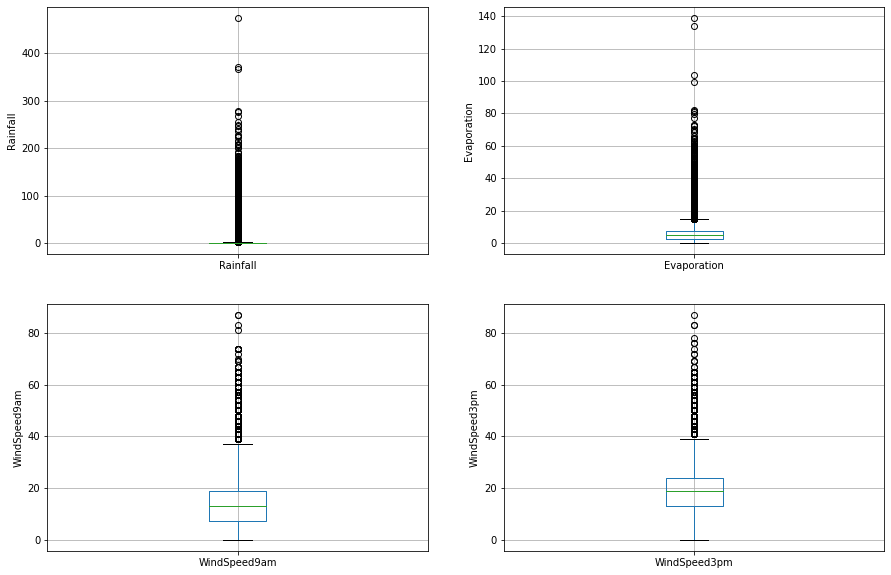

In [45]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

Text(0, 0.5, 'RainTomorrow')

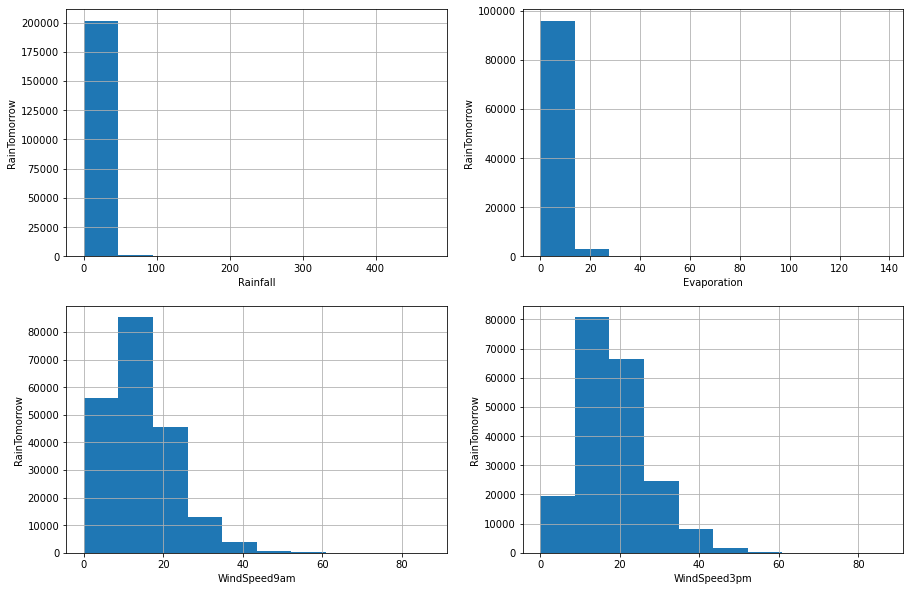

In [46]:
# plot histogram to check distribution

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 2)
fig = df.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 3)
fig = df.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 4)
fig = df.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

In [47]:
# find outliers for Rainfall variable

IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Lower_fence = df.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = df.Rainfall.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Rainfall outliers are values < -1.7999999999999998 or > 2.4


In [48]:
# find outliers for Evaporation variable

IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
Lower_fence = df.Evaporation.quantile(0.25) - (IQR * 3)
Upper_fence = df.Evaporation.quantile(0.75) + (IQR * 3)
print('Evaporation outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Evaporation outliers are values < -11.800000000000002 or > 21.800000000000004


In [49]:
# find outliers for WindSpeed9am variable

IQR = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
Lower_fence = df.WindSpeed9am.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed9am.quantile(0.75) + (IQR * 3)
print('WindSpeed9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

WindSpeed9am outliers are values < -29.0 or > 55.0


In [50]:
# find outliers for WindSpeed3pm variable

IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
Lower_fence = df.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('WindSpeed3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

WindSpeed3pm outliers are values < -20.0 or > 57.0


In [51]:
X = df.drop(['RainTomorrow'], axis=1)

y = df['RainTomorrow']

In [52]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [53]:
X_train.shape, X_test.shape

((166796, 24), (41699, 24))

In [54]:
X_train.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
Year               int64
Month              int64
Day                int64
dtype: object

In [55]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [56]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'Day']

In [57]:
X_train[numerical].isnull().sum()

MinTemp           2606
MaxTemp           2466
Rainfall          4742
Evaporation      87551
Sunshine         94563
WindGustSpeed    12483
WindSpeed9am      3084
WindSpeed3pm      5722
Humidity9am       3470
Humidity3pm       6579
Pressure9am      18315
Pressure3pm      18303
Cloud9am         71208
Cloud3pm         76030
Temp9am           2633
Temp3pm           5763
Year                 0
Month                0
Day                  0
dtype: int64

In [58]:
X_test[numerical].isnull().sum()

MinTemp            679
MaxTemp            619
Rainfall          1188
Evaporation      21979
Sunshine         23639
WindGustSpeed     3176
WindSpeed9am       758
WindSpeed3pm      1532
Humidity9am        881
Humidity3pm       1750
Pressure9am       4685
Pressure3pm       4678
Cloud9am         17868
Cloud3pm         19062
Temp9am            677
Temp3pm           1547
Year                 0
Month                0
Day                  0
dtype: int64

In [59]:
for col in numerical:
    if X_train[col].isnull().mean()>0:
        print(col, round(X_train[col].isnull().mean(),4))

MinTemp 0.0156
MaxTemp 0.0148
Rainfall 0.0284
Evaporation 0.5249
Sunshine 0.5669
WindGustSpeed 0.0748
WindSpeed9am 0.0185
WindSpeed3pm 0.0343
Humidity9am 0.0208
Humidity3pm 0.0394
Pressure9am 0.1098
Pressure3pm 0.1097
Cloud9am 0.4269
Cloud3pm 0.4558
Temp9am 0.0158
Temp3pm 0.0346


In [60]:
for df1 in [X_train, X_test]:
    for col in numerical:
        col_median=X_train[col].median()
        df1[col].fillna(col_median, inplace=True)

In [61]:
X_train[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [62]:
X_test[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [63]:
X_train[categorical].isnull().mean()

Location       0.000000
WindGustDir    0.075356
WindDir9am     0.077328
WindDir3pm     0.041038
RainToday      0.028430
dtype: float64

In [64]:
for df2 in [X_train, X_test]:
    df2['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0], inplace=True)
    df2['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0], inplace=True)
    df2['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0], inplace=True)
    df2['RainToday'].fillna(X_train['RainToday'].mode()[0], inplace=True)

In [65]:
X_train[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [66]:
X_test[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [67]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3['Rainfall'] = max_value(df3, 'Rainfall', 3.2)
    df3['Evaporation'] = max_value(df3, 'Evaporation', 21.8)
    df3['WindSpeed9am'] = max_value(df3, 'WindSpeed9am', 55)
    df3['WindSpeed3pm'] = max_value(df3, 'WindSpeed3pm', 57)

In [68]:
categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [69]:
X_train[categorical].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
187072,Hobart,NNW,NNW,NNW,No
180628,SalmonGums,SE,NE,W,No
137178,Townsville,ESE,SE,ENE,No
107187,Nhil,NW,NW,WNW,No
76232,MountGinini,E,ENE,E,No


In [70]:
import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['RainToday'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [71]:
X_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,Year,Month,Day
187072,Hobart,6.1,17.9,0.0,1.4,7.5,NNW,50.0,NNW,NNW,...,1020.0,7.0,2.0,7.6,17.8,0,1,2014,5,13
180628,SalmonGums,2.5,26.0,0.0,4.8,8.5,SE,33.0,NE,W,...,1015.2,6.0,5.0,16.2,24.4,0,1,2021,12,13
137178,Townsville,19.4,31.3,0.0,4.8,8.5,ESE,43.0,SE,ENE,...,1013.9,6.0,5.0,27.0,30.0,0,1,2020,4,25
107187,Nhil,5.0,19.9,0.6,4.8,8.5,NW,57.0,NW,WNW,...,1015.4,6.0,5.0,11.9,17.7,0,1,2021,9,19
76232,MountGinini,2.2,5.7,0.0,4.8,8.5,E,46.0,ENE,E,...,1015.2,6.0,5.0,3.7,4.7,0,1,2015,4,30


In [72]:
X_train = pd.concat([X_train[numerical], X_train[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_train.Location), 
                     pd.get_dummies(X_train.WindGustDir),
                     pd.get_dummies(X_train.WindDir9am),
                     pd.get_dummies(X_train.WindDir3pm)], axis=1)

In [73]:
X_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
187072,6.1,17.9,0.0,1.4,7.5,50.0,22.0,31.0,76.0,41.0,...,1,0,0,0,0,0,0,0,0,0
180628,2.5,26.0,0.0,4.8,8.5,33.0,7.0,6.0,43.0,22.0,...,0,0,0,0,0,0,0,1,0,0
137178,19.4,31.3,0.0,4.8,8.5,43.0,19.0,33.0,57.0,52.0,...,0,0,0,0,0,0,0,0,0,0
107187,5.0,19.9,0.6,4.8,8.5,57.0,31.0,33.0,70.0,50.0,...,0,0,0,0,0,0,0,0,1,0
76232,2.2,5.7,0.0,4.8,8.5,46.0,17.0,11.0,99.0,100.0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
X_test = pd.concat([X_test[numerical], X_test[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_test.Location), 
                     pd.get_dummies(X_test.WindGustDir),
                     pd.get_dummies(X_test.WindDir9am),
                     pd.get_dummies(X_test.WindDir3pm)], axis=1)

In [75]:
X_test.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
116128,15.1,19.2,0.0,2.8,0.0,44.0,24.0,15.0,71.0,68.0,...,0,0,0,0,0,0,0,0,0,0
190725,7.5,22.2,0.0,4.8,8.5,30.0,7.0,7.0,78.0,60.0,...,0,0,0,0,0,0,0,0,0,0
43276,17.4,24.6,0.0,6.6,8.7,39.0,19.0,31.0,58.0,57.0,...,0,0,0,0,0,0,0,0,0,0
26551,12.7,24.0,0.0,4.8,8.5,30.0,17.0,15.0,58.0,49.0,...,0,1,0,0,0,0,0,0,0,0
154009,23.7,34.8,0.0,4.8,8.5,44.0,28.0,20.0,47.0,27.0,...,0,0,0,1,0,0,0,0,0,0


In [76]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
count,166796.000000,166796.000000,166796.000000,166796.000000,166796.000000,166796.000000,166796.000000,166796.000000,166796.000000,166796.000000,...,166796.000000,166796.000000,166796.000000,166796.000000,166796.000000,166796.000000,166796.000000,166796.000000,166796.000000,166796.000000
mean,12.084868,23.243202,0.649178,5.109854,8.131814,40.037267,14.053496,18.663043,68.686275,51.153049,...,0.052735,0.058263,0.065889,0.113540,0.062460,0.056812,0.062525,0.068851,0.060775,0.065649
std,6.385993,7.091738,1.167983,2.581957,2.518925,13.044078,8.800913,8.573530,19.328805,20.655797,...,0.223505,0.234240,0.248088,0.317253,0.241989,0.231484,0.242108,0.253201,0.238918,0.247668
min,-8.700000,-3.800000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.600000,18.000000,0.000000,4.800000,8.500000,31.000000,7.000000,13.000000,57.000000,36.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11.900000,22.700000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16.700000,28.200000,0.600000,4.800000,8.500000,46.000000,19.000000,24.000000,83.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,33.900000,48.900000,3.200000,21.800000,14.500000,135.000000,55.000000,57.000000,100.000000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [77]:
cols = X_train.columns

In [78]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [79]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [80]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
count,166796.000000,166796.000000,166796.000000,166796.000000,166796.000000,166796.000000,166796.000000,166796.000000,166796.000000,166796.000000,...,166796.000000,166796.000000,166796.000000,166796.000000,166796.000000,166796.000000,166796.000000,166796.000000,166796.000000,166796.000000
mean,0.487908,0.513154,0.202868,0.234397,0.560815,0.285994,0.255518,0.327422,0.686863,0.511530,...,0.052735,0.058263,0.065889,0.113540,0.062460,0.056812,0.062525,0.068851,0.060775,0.065649
std,0.149906,0.134568,0.364995,0.118438,0.173719,0.098076,0.160017,0.150413,0.193288,0.206558,...,0.223505,0.234240,0.248088,0.317253,0.241989,0.231484,0.242108,0.253201,0.238918,0.247668
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.382629,0.413662,0.000000,0.220183,0.586207,0.218045,0.127273,0.228070,0.570000,0.360000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.483568,0.502846,0.000000,0.220183,0.586207,0.278195,0.236364,0.333333,0.700000,0.520000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.596244,0.607211,0.187500,0.220183,0.586207,0.330827,0.345455,0.421053,0.830000,0.650000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [81]:
y_train.fillna('Yes',inplace=True)
y_test.fillna('Yes',inplace=True)

In [82]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [83]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array(['Yes', 'No', 'No', ..., 'No', 'Yes', 'No'], dtype=object)

In [84]:
# probability of getting output as 0 - no rain

logreg.predict_proba(X_test)[:,0]

array([0.40401211, 0.94783797, 0.83423034, ..., 0.9788821 , 0.32928284,
       0.88280924])

In [85]:
# probability of getting output as 1 - rain

logreg.predict_proba(X_test)[:,1]

array([0.59598789, 0.05216203, 0.16576966, ..., 0.0211179 , 0.67071716,
       0.11719076])

In [86]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8329


In [87]:
y_pred_train = logreg.predict(X_train)

y_pred_train

array(['No', 'No', 'No', ..., 'Yes', 'No', 'No'], dtype=object)

In [88]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8349


In [89]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8349
Test set score: 0.8329


In [90]:
y_test.value_counts()

No     31538
Yes    10161
Name: RainTomorrow, dtype: int64

In [91]:
# check null accuracy score

null_accuracy = (31538/(31538+10161))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7563


In [92]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[29652  1886]
 [ 5081  5080]]

True Positives(TP) =  29652

True Negatives(TN) =  5080

False Positives(FP) =  1886

False Negatives(FN) =  5081


<AxesSubplot:>

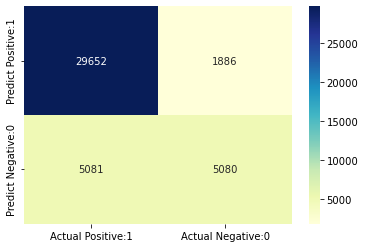

In [93]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [94]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          No       0.85      0.94      0.89     31538
         Yes       0.73      0.50      0.59     10161

    accuracy                           0.83     41699
   macro avg       0.79      0.72      0.74     41699
weighted avg       0.82      0.83      0.82     41699



In [95]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8329


In [96]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1671


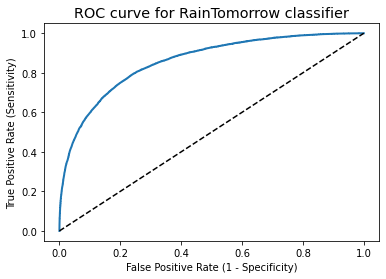

In [97]:
# plot ROC Curve
y_pred1 = logreg.predict_proba(X_test)[:,1]
    
y_pred1 = y_pred1.reshape(-1,1)
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = 'Yes')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for RainTomorrow classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()


In [98]:

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8571


In [99]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.83228417 0.83326838 0.83326838 0.83776492 0.83599628]


In [100]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8345


In [101]:
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]



grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy')

In [102]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.8347


Parameters that give the best results : 

 {'C': 10}


Estimator that was chosen by the search : 

 LogisticRegression(C=10, random_state=0, solver='liblinear')


In [103]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.8328
